# Part 1- Import Necessary Libraries and Check Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
plt.style.use('ggplot')
import os
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score, explained_variance_score,median_absolute_error, mean_squared_error, mean_absolute_error

In [2]:
dataset = pd.read_csv("/Users/berk.erol/Desktop/EuropeanSales.csv",delimiter=',')

In [3]:
cwd = os.getcwd()
cwd

'/Users/berk.erol/Desktop/Bahçeşehir Big Data Courses/Second Semester/BDA5002-Marketing Analytics/Week 1'

In [4]:
dataset.head()

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
0,Austria,8.4,49.60,4.2,5.8,112,941
1,Belgium,10.5,47.09,8.1,5.9,160,1682
2,Bulgaria,7.6,6.55,13.5,3.5,20,154
3,Czech Rep.,10.2,20.67,6.6,4.4,101,1029
4,Denmark,5.5,62.12,5.2,8.4,170,935


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            21 non-null     object 
 1   Population         21 non-null     float64
 2   GDPperHead         21 non-null     float64
 3   UnemploymentRate   21 non-null     float64
 4   EducationSpending  21 non-null     float64
 5   SalesPerCapita     21 non-null     int64  
 6   ComputerSales      21 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.3+ KB


In [6]:
print(dataset.columns)

Index(['Country', 'Population', 'GDPperHead', 'UnemploymentRate',
       'EducationSpending', 'SalesPerCapita', 'ComputerSales'],
      dtype='object')


In [7]:
print(dataset.dtypes)

Country               object
Population           float64
GDPperHead           float64
UnemploymentRate     float64
EducationSpending    float64
SalesPerCapita         int64
ComputerSales          int64
dtype: object


In [8]:
dataset.describe()

,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,26.723810,36.973810,8.100000,5.180952,115.333333,2492.809524
std,26.128929,18.654496,3.122979,1.269889,78.970459,2499.807965
min,4.400000,6.550000,3.600000,3.300000,20.000000,154.000000
25%,8.400000,20.670000,6.300000,4.400000,68.000000,813.000000
50%,10.700000,43.540000,7.300000,5.000000,101.000000,1682.000000
75%,44.800000,51.320000,9.900000,5.800000,151.000000,2879.000000
max,82.500000,64.430000,14.400000,8.400000,372.000000,9887.000000


In [9]:
print(dataset.isnull().sum())

Country              0
Population           0
GDPperHead           0
UnemploymentRate     0
EducationSpending    0
SalesPerCapita       0
ComputerSales        0
dtype: int64


# Part 2 - Make Explanotary Data Analysis and Proceed with Preprocessing Steps

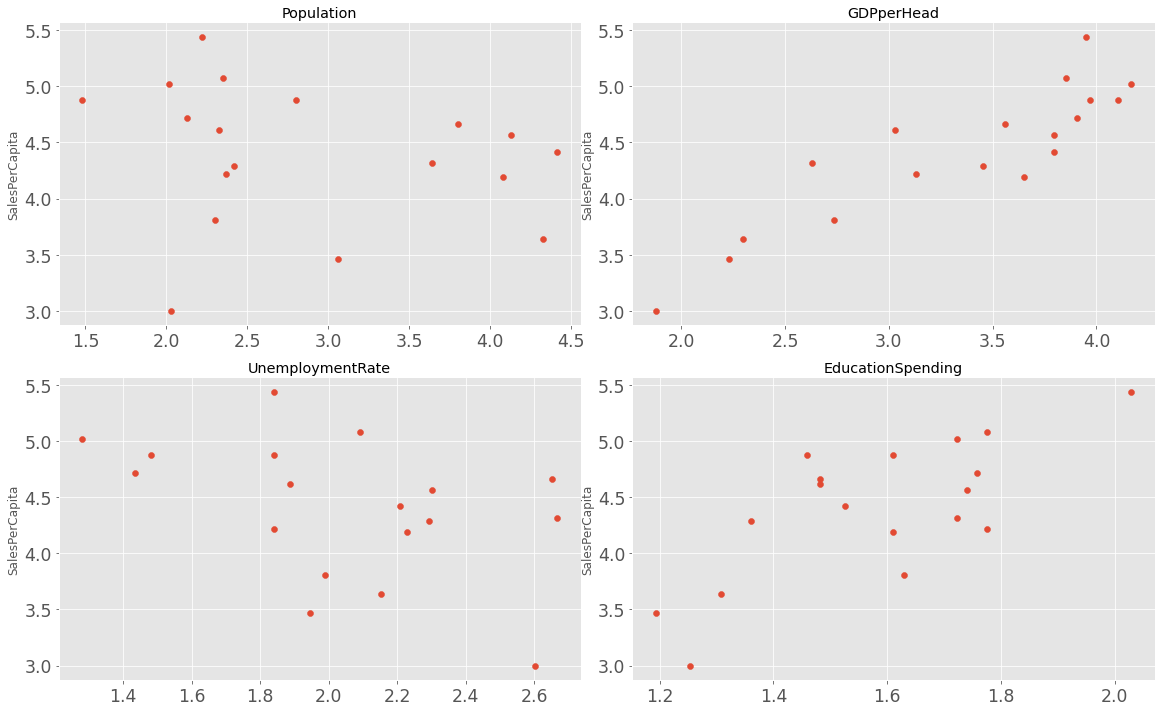

In [95]:
fig,axs = plt.subplots(2,2)
rcParams['figure.figsize'] = 16,10
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'
axs[0,0].scatter(dataset["Population"], dataset["SalesPerCapita"])
axs[0,0].set_title("Population")
axs[0,1].scatter(dataset["GDPperHead"], dataset["SalesPerCapita"])
axs[0,1].set_title("GDPperHead")
axs[1,0].scatter(dataset["UnemploymentRate"], dataset["SalesPerCapita"])
axs[1,0].set_title("UnemploymentRate")
axs[1,1].scatter(dataset["EducationSpending"], dataset["SalesPerCapita"])
axs[1,1].set_title("EducationSpending")
fig.tight_layout()
for ax in axs.flat:
    ax.set(ylabel='SalesPerCapita')

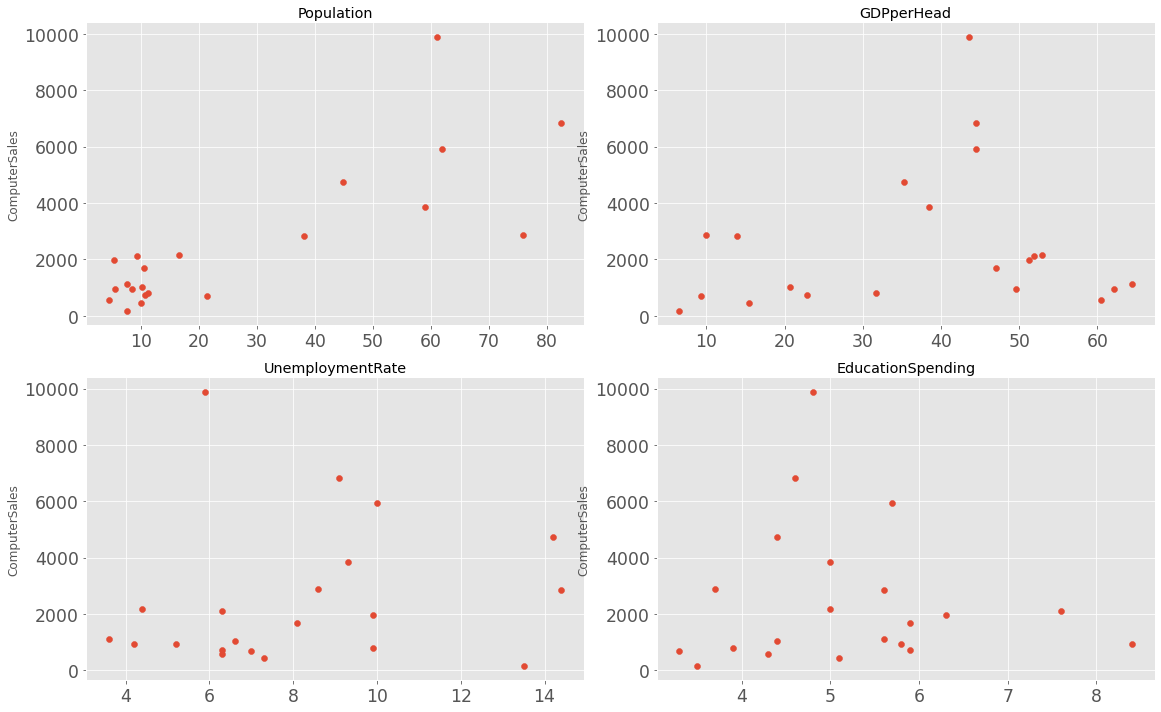

In [11]:
fig,axs = plt.subplots(2,2)
rcParams['figure.figsize'] = 16,10
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'
axs[0,0].scatter(dataset["Population"], dataset["ComputerSales"])
axs[0,0].set_title("Population")
axs[0,1].scatter(dataset["GDPperHead"], dataset["ComputerSales"])
axs[0,1].set_title("GDPperHead")
axs[1,0].scatter(dataset["UnemploymentRate"], dataset["ComputerSales"])
axs[1,0].set_title("UnemploymentRate")
axs[1,1].scatter(dataset["EducationSpending"], dataset["ComputerSales"])
axs[1,1].set_title("EducationSpending")
fig.tight_layout()
for ax in axs.flat:
    ax.set(ylabel='ComputerSales')

/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

<AxesSubplot:xlabel='EducationSpending', ylabel='Density'>

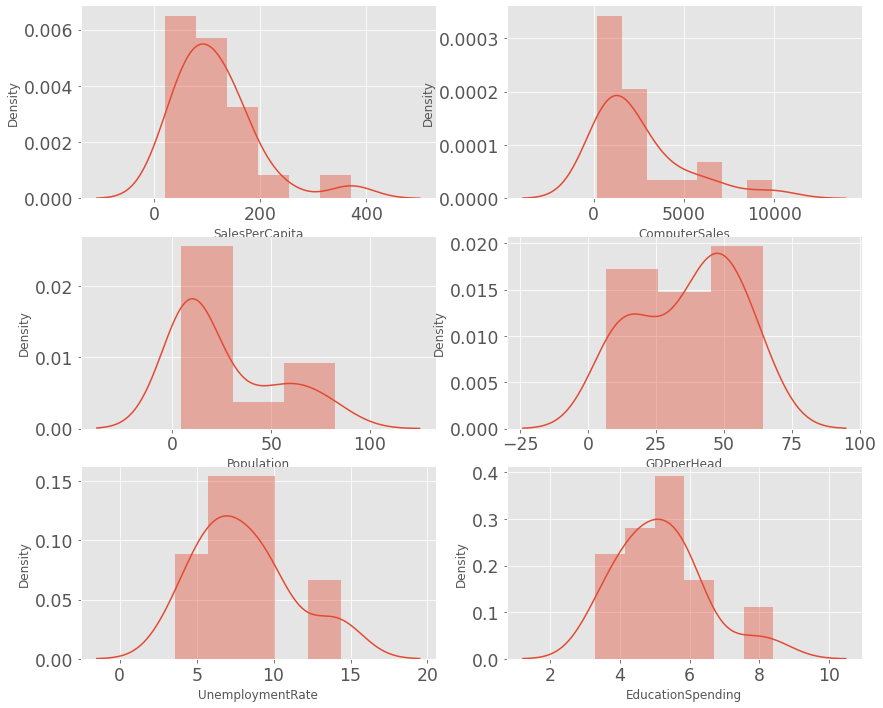

In [12]:
plt.figure(figsize = (14,12))

plt.subplot(3,2,1)
sns.distplot(dataset['SalesPerCapita'])

plt.subplot(3,2,2)
sns.distplot(dataset['ComputerSales'])

plt.subplot(3,2,3)
sns.distplot(dataset['Population'])

plt.subplot(3,2,4)
sns.distplot(dataset['GDPperHead'])

plt.subplot(3,2,5)
sns.distplot(dataset['UnemploymentRate'])

plt.subplot(3,2,6)
sns.distplot(dataset['EducationSpending'])

The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [13]:
dataset.skew()

Population           1.045463
GDPperHead          -0.294859
UnemploymentRate     0.720345
EducationSpending    0.850790
SalesPerCapita       1.812854
ComputerSales        1.704270
dtype: float64

In [14]:
dataset.var()

Population           6.827209e+02
GDPperHead           3.479902e+02
UnemploymentRate     9.753000e+00
EducationSpending    1.612619e+00
SalesPerCapita       6.236333e+03
ComputerSales        6.249040e+06
dtype: float64

In [15]:
dataset.drop("Country",axis=1,inplace=True) #inplace True yaparsak komple silinir

/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


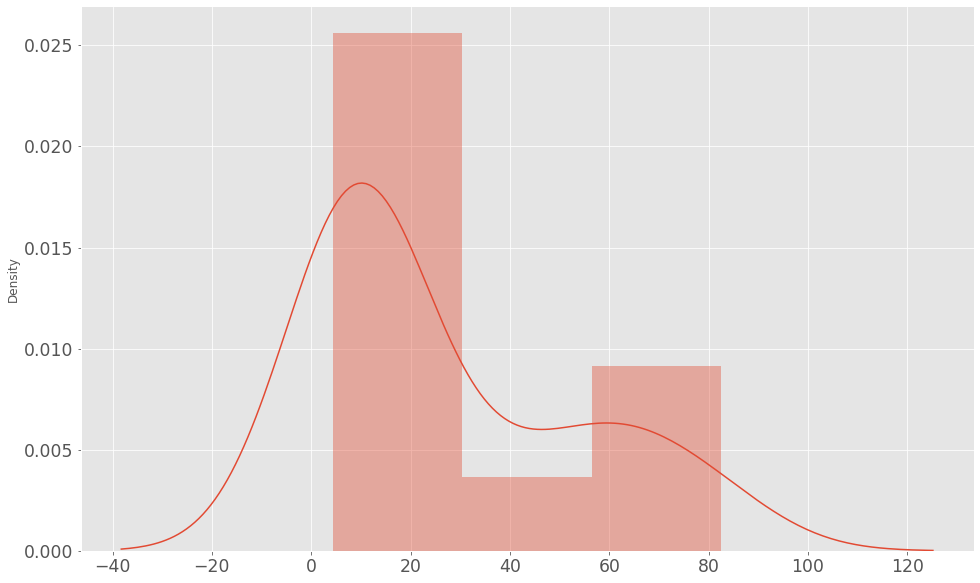

In [16]:
sns.distplot(x=dataset['Population'])
plt.show();

AxesSubplot(0.125,0.125;0.775x0.755)


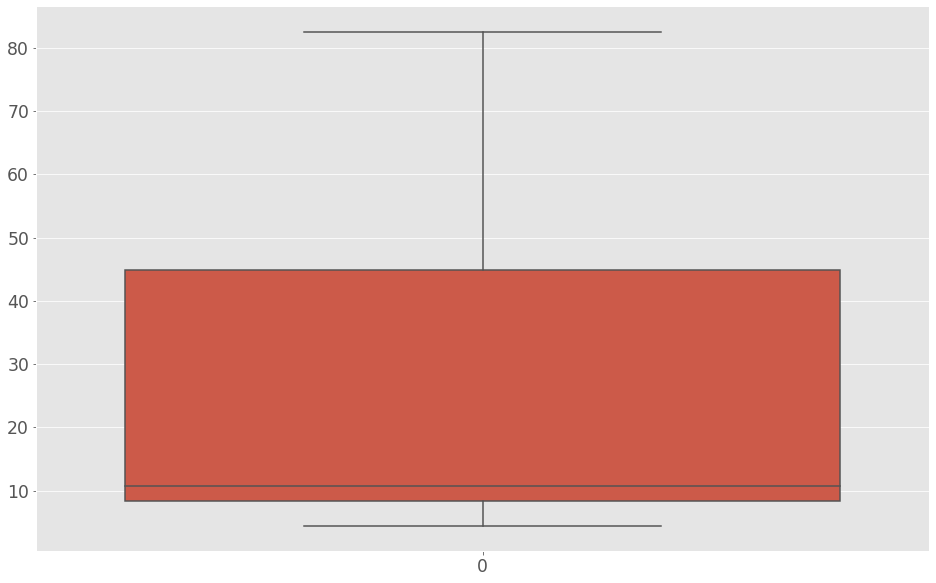

In [17]:
dataset_pop = dataset['Population']
print(sns.boxplot(data=dataset_pop))

In [18]:
Q1 = dataset.Population.quantile(q=0.25)
Q3 = dataset.Population.quantile(q=0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
dataset = dataset[(dataset['Population'] > lower_bound) & (dataset['Population'] < upper_bound)]
dataset.shape

(21, 6)

/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


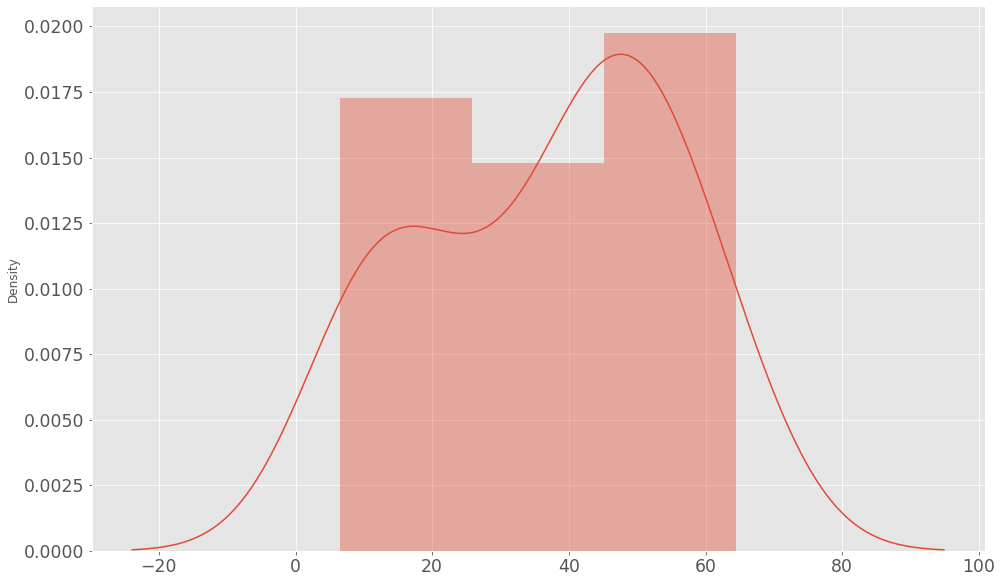

In [19]:
sns.distplot(x=dataset['GDPperHead'])
plt.show();

AxesSubplot(0.125,0.125;0.775x0.755)


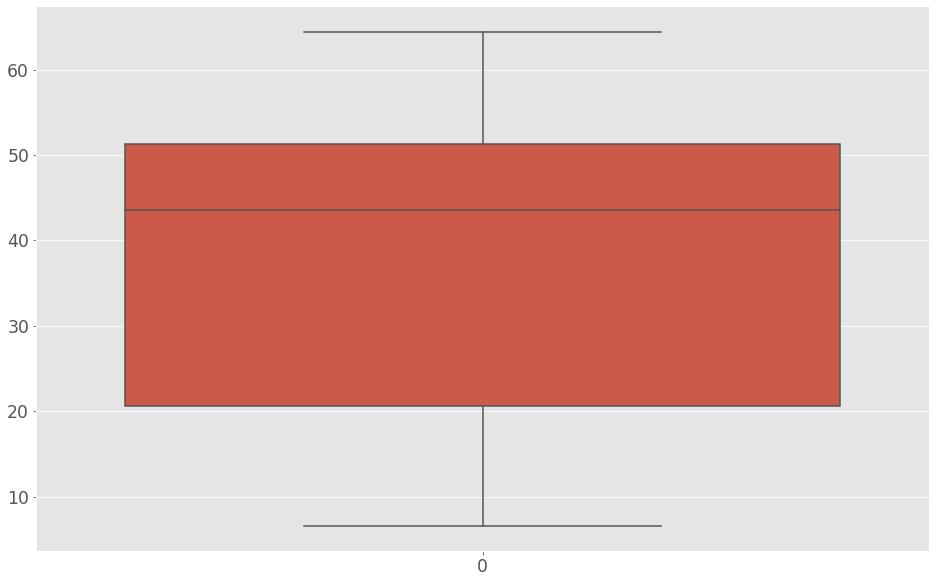

In [20]:
dataset_gdp = dataset['GDPperHead']
print(sns.boxplot(data=dataset_gdp))

In [21]:
Q1 = dataset.GDPperHead.quantile(q=0.25)
Q3 = dataset.GDPperHead.quantile(q=0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
dataset = dataset[(dataset['GDPperHead'] > lower_bound) & (dataset['GDPperHead'] < upper_bound)]
dataset.shape

(21, 6)

/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


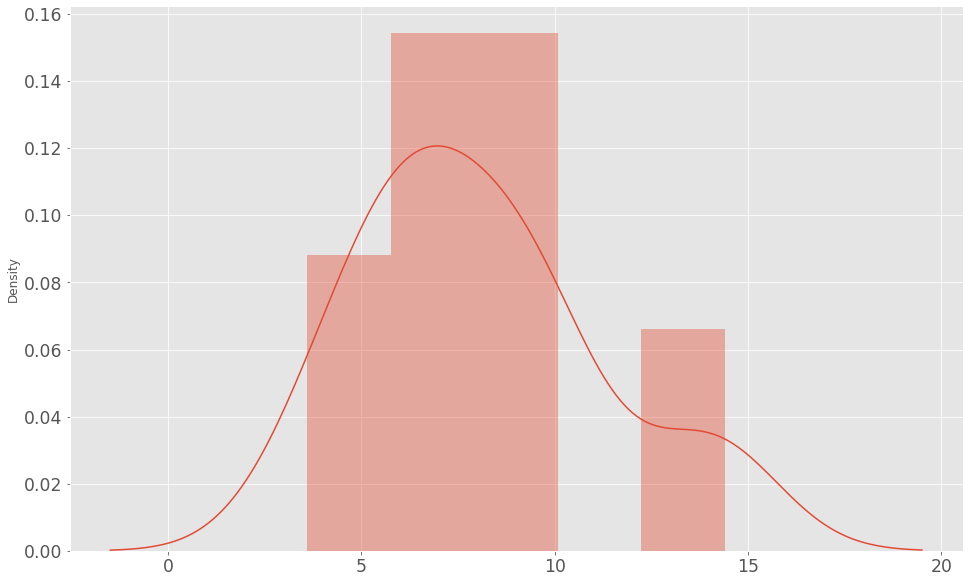

In [22]:
sns.distplot(x=dataset['UnemploymentRate'])
plt.show();

AxesSubplot(0.125,0.125;0.775x0.755)


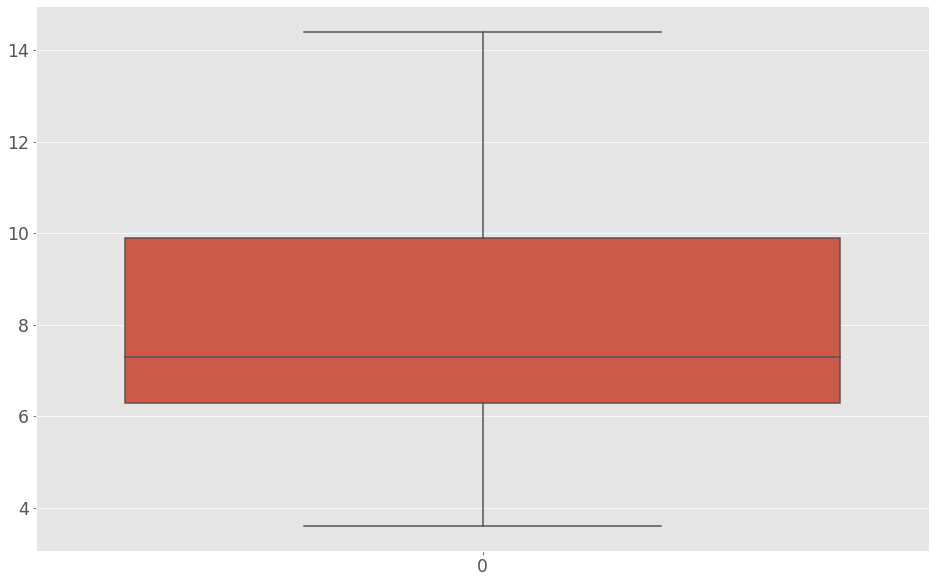

In [23]:
dataset_rate = dataset['UnemploymentRate']
print(sns.boxplot(data=dataset_rate))

In [24]:
Q1 = dataset.UnemploymentRate.quantile(q=0.25)
Q3 = dataset.UnemploymentRate.quantile(q=0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
dataset = dataset[(dataset['UnemploymentRate'] > lower_bound) & (dataset['UnemploymentRate'] < upper_bound)]
dataset.shape

(21, 6)

/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


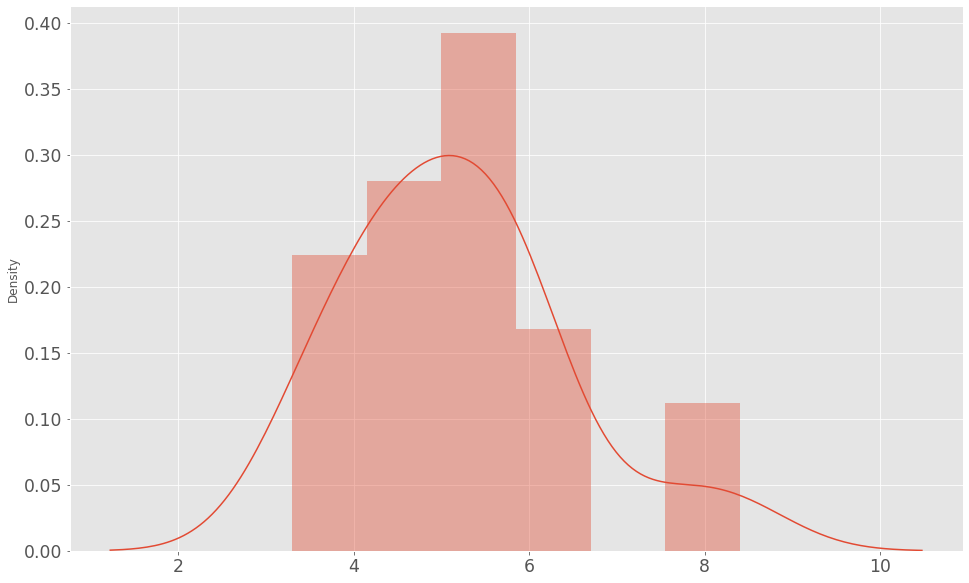

In [25]:
sns.distplot(x=dataset['EducationSpending'])
plt.show();

AxesSubplot(0.125,0.125;0.775x0.755)


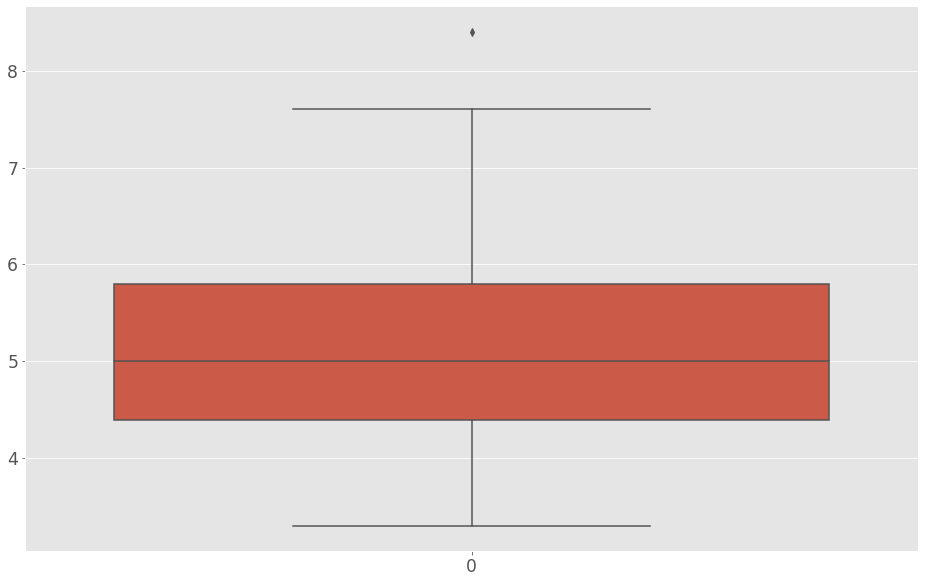

In [26]:
dataset_spend = dataset['EducationSpending']
print(sns.boxplot(data=dataset_spend))

In [27]:
Q1 = dataset.EducationSpending.quantile(q=0.25)
Q3 = dataset.EducationSpending.quantile(q=0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
dataset = dataset[(dataset['EducationSpending'] > lower_bound) & (dataset['EducationSpending'] < upper_bound)]
dataset.shape

(20, 6)

/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


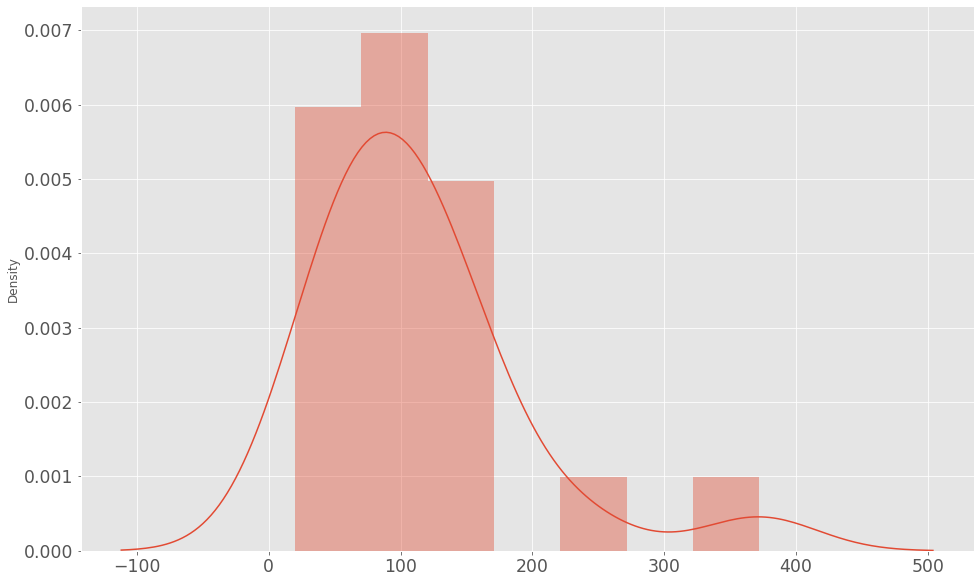

In [28]:
sns.distplot(x=dataset['SalesPerCapita'])
plt.show();

AxesSubplot(0.125,0.125;0.775x0.755)


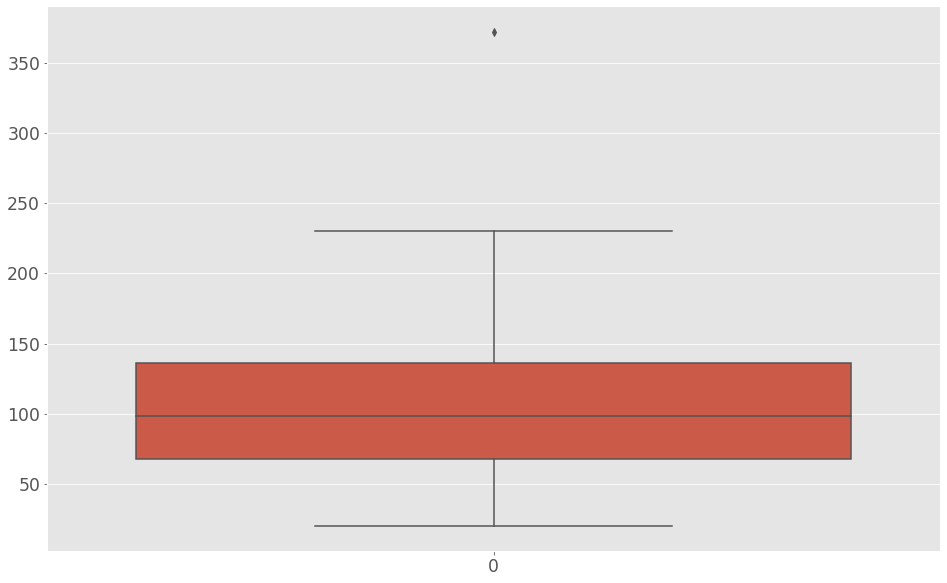

In [29]:
dataset_capita = dataset['SalesPerCapita']
print(sns.boxplot(data=dataset_capita))

In [30]:
Q1 = dataset.SalesPerCapita.quantile(q=0.25)
Q3 = dataset.SalesPerCapita.quantile(q=0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
dataset = dataset[(dataset['SalesPerCapita'] > lower_bound) & (dataset['SalesPerCapita'] < upper_bound)]
dataset.shape

(19, 6)

/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


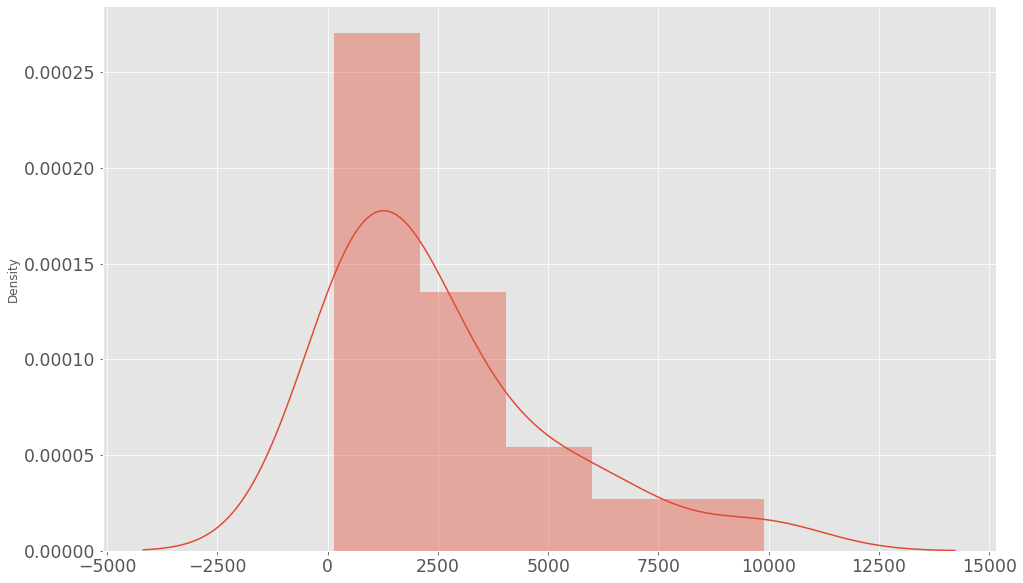

In [31]:
sns.distplot(x=dataset['ComputerSales'])
plt.show();

AxesSubplot(0.125,0.125;0.775x0.755)


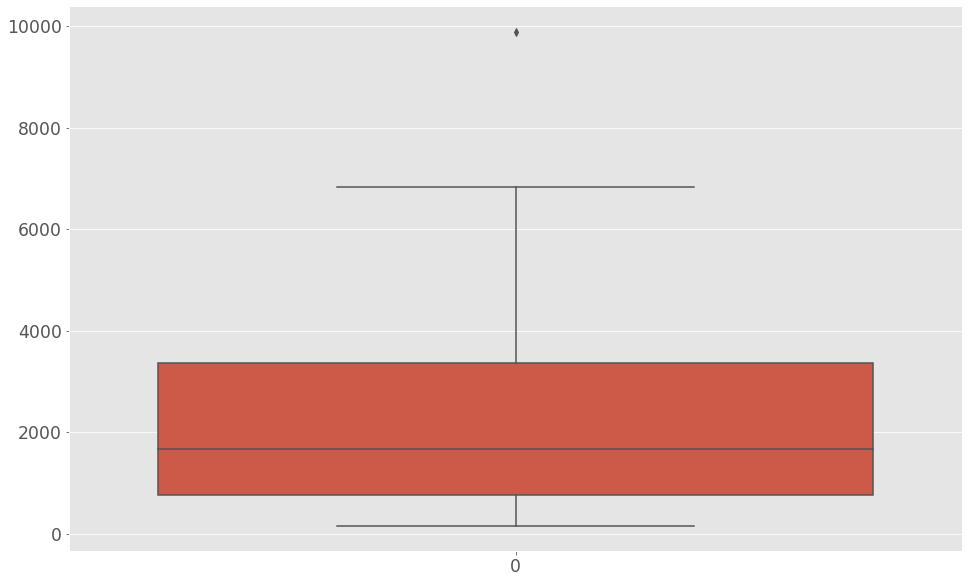

In [32]:
dataset_sales = dataset['ComputerSales']
print(sns.boxplot(data=dataset_sales))

In [33]:
Q1 = dataset.ComputerSales.quantile(q=0.25)
Q3 = dataset.ComputerSales.quantile(q=0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
dataset = dataset[(dataset['ComputerSales'] > lower_bound) & (dataset['ComputerSales'] < upper_bound)]
dataset.shape

(18, 6)

In [34]:
dataset.skew()

Population           1.120392
GDPperHead          -0.077754
UnemploymentRate     0.641295
EducationSpending    0.531351
SalesPerCapita       0.877960
ComputerSales        1.213185
dtype: float64

In [35]:
dataset = np.log(dataset)
dataset.skew()

Population           0.488673
GDPperHead          -0.771081
UnemploymentRate    -0.174413
EducationSpending   -0.036823
SalesPerCapita      -0.644767
ComputerSales       -0.329904
dtype: float64

<AxesSubplot:>

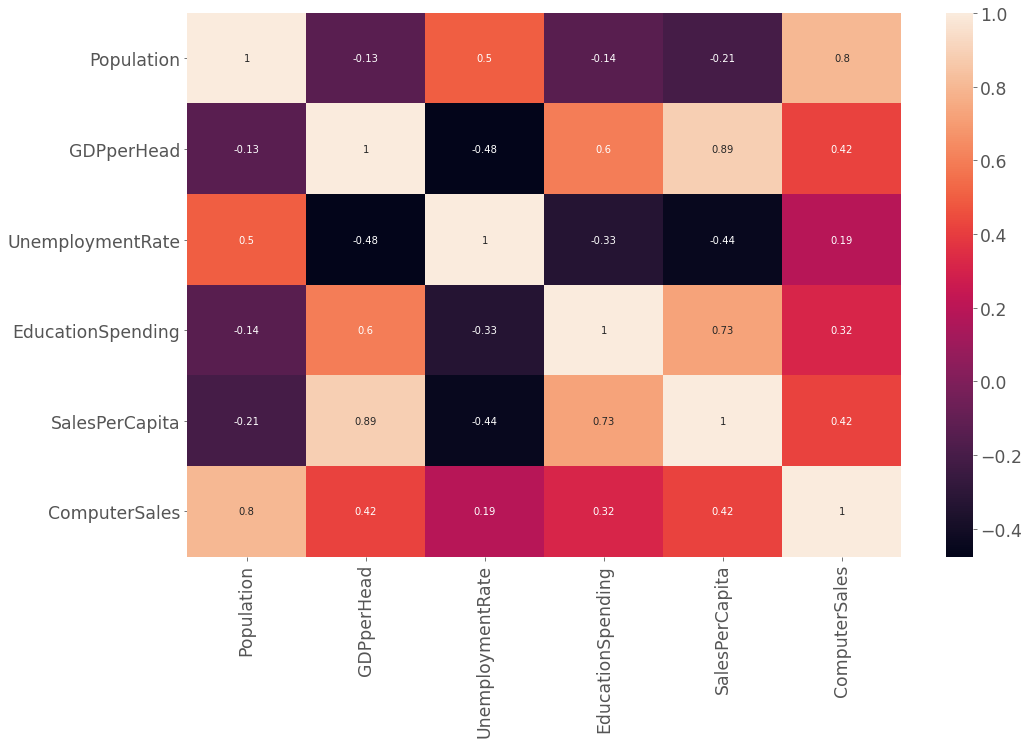

In [36]:
sns.heatmap(dataset.corr(), annot=True)

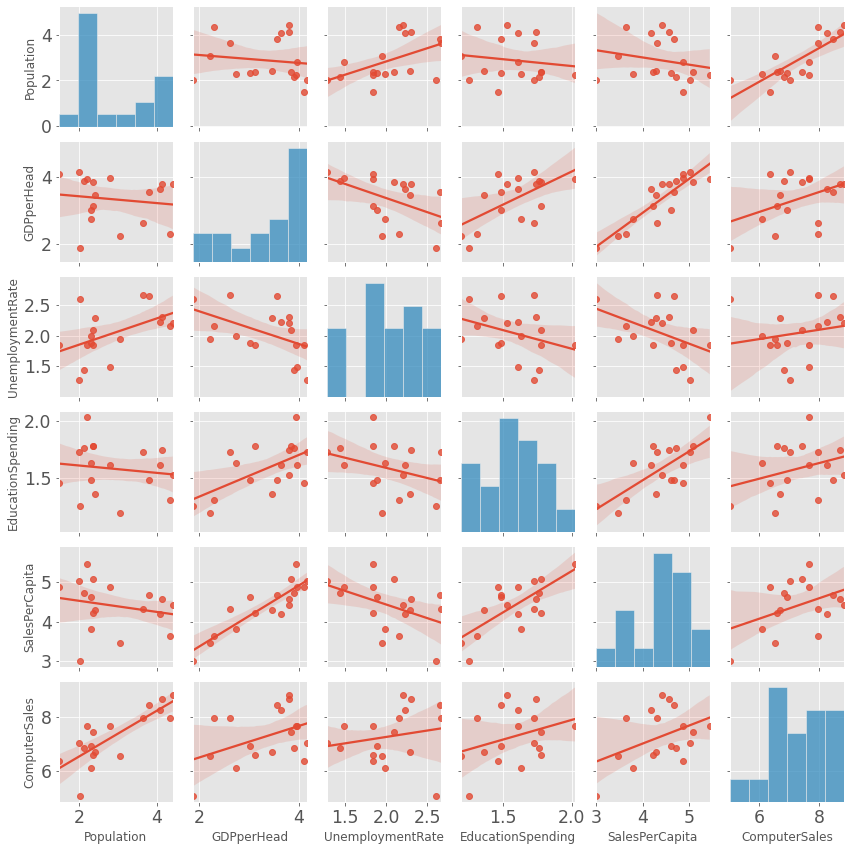

In [37]:
sns.pairplot(dataset,height=2,kind='reg')

In [38]:
#dataset = np.log(dataset)

In [39]:
#dataset.skew()

In [40]:
column_list = [column for column in dataset[0:]]
print(column_list)

['Population', 'GDPperHead', 'UnemploymentRate', 'EducationSpending', 'SalesPerCapita', 'ComputerSales']


In [41]:
new_data=[]
def high_corr(data,target):
    for column in column_list:
        if (np.corrcoef(data[column],data[target])[0,1] > 0.5):
            new_data.append([column])
    return new_data

In [42]:
high_corr(dataset,"SalesPerCapita")

[['GDPperHead'], ['EducationSpending'], ['SalesPerCapita']]

In [43]:
high_corr(dataset,"ComputerSales")

[['GDPperHead'],
 ['EducationSpending'],
 ['SalesPerCapita'],
 ['Population'],
 ['ComputerSales']]

In [44]:
def adjusted_r_squared(r2, data):
    
    d = (1-r2)*(data.shape[0]-1)/(data.shape[0]-data.shape[1]-1) 
    
    return 1-d

# Part 3a - Build Linear Regression Model for SalesPerCapita

In [45]:
X = dataset[['GDPperHead','EducationSpending','ComputerSales','Population','UnemploymentRate']].values
y = dataset["SalesPerCapita"].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
steps =[('scaler', StandardScaler()),('linear_reg',LinearRegression())]
pipeline = Pipeline(steps)

In [48]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [49]:
prediction = pipeline.predict(X_test)
prediction

array([4.71984313, 5.07850368, 4.87650417, 4.42040579])

In [50]:
model_Rsquared = r2_score(y_test,prediction)

In [51]:
model_Rsquared

0.9999259055928083

In [52]:
model_mae = mean_absolute_error(y_test,prediction)
model_mae

0.001886539104561491

In [53]:
model_exp_var = explained_variance_score(y_test,prediction)
model_exp_var

0.9999877619717477

In [54]:
model_mse = mean_squared_error(y_test,prediction)
model_mse

4.263169089662768e-06

In [55]:
model_rmse = np.sqrt(model_mse)
model_rmse

0.00206474431580832

In [56]:
model1_train_set_Rsquared = pipeline.score(X_train,y_train)
model1_train_set_Rsquared

0.999966225945647

In [57]:
model1_test_set_Rsquared = pipeline.score(X_test,y_test)
model1_test_set_Rsquared

0.9999259055928083

In [58]:
model1_train_set_adj_R = adjusted_r_squared(model1_train_set_Rsquared,dataset)
model1_train_set_adj_R

0.9999478037341817

In [59]:
model1_test_set_adj_R = adjusted_r_squared(model1_test_set_Rsquared,dataset)
model1_test_set_adj_R

0.9998854904616128

# Part 3b - Build Linear Regression Model for ComputerSales

In [60]:
dependent2 = ["ComputerSales"]

In [61]:
X2 = dataset[["Population",'GDPperHead','EducationSpending','Population','UnemploymentRate']].values
y2 = dataset[dependent2].values

In [62]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [67]:
steps2 =[('scaler', StandardScaler()),('linear_reg',LinearRegression())]
pipeline2 = Pipeline(steps2)

In [68]:
pipeline2.fit(X2_train,y2_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [69]:
prediction2 = pipeline2.predict(X2_test)
prediction2

array([[6.98048924],
       [7.2417131 ],
       [6.20539497],
       [9.00773522],
       [6.36593526],
       [6.29286367]])

In [70]:
model2_train_set_Rsquared = pipeline2.score(X2_train,y2_train)
model2_train_set_Rsquared

0.9556345830234203

In [71]:
model2_test_set_Rsquared = pipeline2.score(X2_test,y2_test)
model2_test_set_Rsquared

0.878554628597111

In [72]:
model2_exp_var = explained_variance_score(y2_test,prediction2)
model2_exp_var

0.9073376194926165

In [73]:
model2_Rsquared = r2_score(y2_test,prediction2)
model2_Rsquared

0.878554628597111

In [74]:
model2_mae = mean_absolute_error(y2_test,prediction2)
model2_mae

0.24357189223859002

In [75]:
model2_mse = mean_squared_error(y2_test,prediction2)
model2_mse

0.08177061304776395

In [76]:
model2_rmse = np.sqrt(model2_mse)
model2_rmse

0.2859556137720747

In [77]:
model2_train_set_adj_R = adjusted_r_squared(model2_train_set_Rsquared,dataset)
model2_train_set_adj_R

0.9314352646725587

In [78]:
model2_test_set_adj_R = adjusted_r_squared(model2_test_set_Rsquared,dataset)
model2_test_set_adj_R

0.8123116987409897

In [79]:
data1 = [model1_train_set_Rsquared,model2_train_set_Rsquared]

In [80]:
table1 = pd.DataFrame(data1,columns=['R-Squared for Train Set'],index=['Model for SalesPerCapita','Model for ComputerSales'])

In [81]:
data2 = [model1_test_set_Rsquared,model2_test_set_Rsquared]

In [82]:
table2 = pd.DataFrame(data2,columns=['R-Squared for Test Set'],index=['Model for SalesPerCapita','Model for ComputerSales'])

In [83]:
data2a = [model1_train_set_adj_R,model2_train_set_adj_R]

In [84]:
table2a = pd.DataFrame(data2a,columns=['Adjusted R-Squared for Train Set'],index=['Model for SalesPerCapita','Model for ComputerSales'])

In [85]:
data2b = [model1_test_set_adj_R,model2_test_set_adj_R]

In [86]:
table2b = pd.DataFrame(data2b,columns=['Adjusted R-Squared for Test Set'],index=['Model for SalesPerCapita','Model for ComputerSales'])

In [87]:
data3 = [model_exp_var,model2_exp_var]

In [88]:
table3 = pd.DataFrame(data3,columns=['Explained Variance Score'],index=['Model for SalesPerCapita','Model for ComputerSales'])

In [89]:
data4 = [model_mae,model2_mae]

In [90]:
table4 = pd.DataFrame(data4,columns=['Mean Absolute Error'],index=['Model for SalesPerCapita','Model for ComputerSales'])

In [91]:
data5 = [model_rmse,model2_rmse]

In [92]:
table5 = pd.DataFrame(data5,columns=['Root Mean Squared Error'],index=['Model for SalesPerCapita','Model for ComputerSales'])

In [93]:
main_table = pd.concat((table1,table2,table2a,table2b,table3,table4,table5),join='inner',axis=1)

In [94]:
main_table

,R-Squared for Train Set,R-Squared for Test Set,Adjusted R-Squared for Train Set,Adjusted R-Squared for Test Set,Explained Variance Score,Mean Absolute Error,Root Mean Squared Error
Model for SalesPerCapita,0.999966,0.999926,0.999948,0.999885,0.999988,0.001887,0.002065
Model for ComputerSales,0.955635,0.878555,0.931435,0.812312,0.907338,0.243572,0.285956
